In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import *
from sklearn.ensemble import *
import matplotlib.pyplot as plt
import sklearn.linear_model as linear_model
from sklearn.model_selection import *
from sklearn.neighbors import *
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
sns.color_palette("hls", 8)
def rf(dataframe, series):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(dataframe, series, test_size=0.3, random_state=42)

    # Create a random forest classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the classifier
    rf_classifier.fit(X_train, y_train)

    # Predict on the test set
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, rf_classifier.predict(X_test))
    print("Accuracy\n"+str(accuracy))
    # Get the feature importances
    feature_importances = rf_classifier.feature_importances_

    #Print the feature importances
    for feature, importance in zip(dataframe.columns, feature_importances):
        print(f"{feature}: {importance}")

def knn(xCat, yCat, title="Confusion Matrix"):
    scaler = StandardScaler()
    scaler.fit(xCat)
    standardized_data = scaler.transform(xCat)
    standardized_df = pd.DataFrame(standardized_data, columns=xCat.columns)
    x_train, x_test, y_train, y_test = train_test_split(standardized_df, yCat, test_size=0.3, random_state=42)
    knn = KNeighborsClassifier()
    knn.fit(x_train, y_train)

    cm = confusion_matrix(y_test, knn.predict(x_test))
    ax= plt.subplot()
    #annot=True to annotate cells, ftm='g' to disable scientific notation
    sns.heatmap(cm, annot=True, fmt='g', ax=ax).set(title=title)
    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(title)
    ax.xaxis.set_ticklabels(['Red', 'White'])
    ax.yaxis.set_ticklabels(['Red', 'White'])

    plt.show()
    print("Accuracy")
    print(knn.score(x_test, y_test))
def allTesting(xCat, yCat, title = "Confusion Matrix"):
    x_train, x_test, y_train, y_test = train_test_split(xCat, yCat, test_size=0.3, random_state=42)
    logm = linear_model.LogisticRegression()
    logm.fit(x_train, y_train)

    cm = confusion_matrix(y_test, logm.predict(x_test))
    ax= plt.subplot()
    #annot=True to annotate cells, ftm='g' to disable scientific notation
    sns.heatmap(cm, annot=True, fmt='g', ax=ax).set(title=title)
    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(title)
    ax.xaxis.set_ticklabels(['Red', 'White'])
    ax.yaxis.set_ticklabels(['Red','White'])

    plt.show()
    print("Accuracy")
    print(logm.score(x_test, y_test))
def write_dataframe_to_csv(stringA, stringB):
    # Create an empty dataframe with two columns
    df = pd.DataFrame(columns=["word", "number"])

    # Split the input string into lines
    lines = stringA.split("\n")

    # Loop over the lines and split each line into a word and a number
    for line in lines:
        if len(line) > 0:
            # Split the line into three parts: the word, the space-separated middle part, and the number
            parts = line.split()
            word = " ".join(parts[:-1])
            number = float(parts[-1])
            df = df.append({"word": word, "number": number}, ignore_index=True)

    # Write the dataframe to a CSV file
    df.to_csv(stringB, index=False)


In [3]:
redDF = pd.read_csv('winequality-red.csv', sep=";")
whiteDF = pd.read_csv('winequality-white.csv', sep=";")
redDF['wine_color'] = False
whiteDF['wine_color'] = True
combinedDF = pd.concat([redDF,whiteDF], ignore_index=True)
outDF = combinedDF['wine_color']
inputDF = combinedDF.drop(['wine_color'], axis = 1)

Logistic


/home/aidan/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


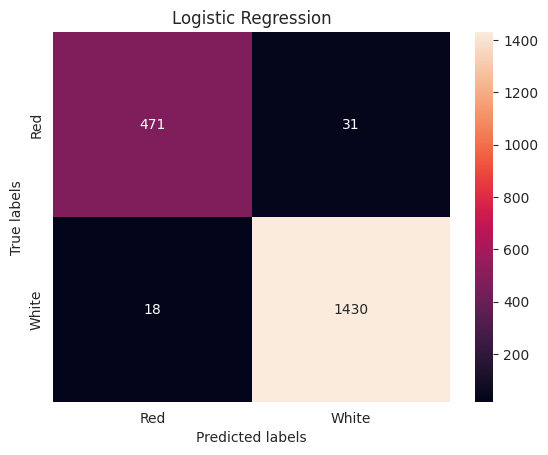

Accuracy
0.9748717948717949


Knn


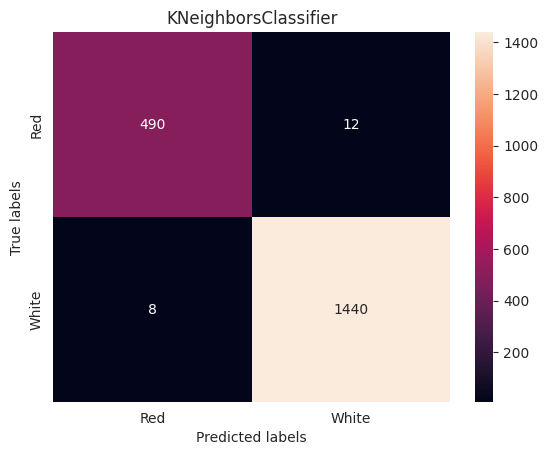

Accuracy
0.9897435897435898



RF
Accuracy
0.9958974358974358
fixed acidity: 0.04740266882686225
volatile acidity: 0.1371432383849635
citric acid: 0.013583399770640204
residual sugar: 0.04302177383573159
chlorides: 0.26676551460673426
free sulfur dioxide: 0.06028165704039515
total sulfur dioxide: 0.28969635747839845
density: 0.05603045885050049
pH: 0.021459436270678364
sulphates: 0.0542931353732821
alcohol: 0.00790440448243881
quality: 0.0024179550793748065


In [4]:
#Definately best R^2 for linear


print("Logistic")
allTesting(inputDF,outDF, title="Logistic Regression")
print("\n\nKnn")
knn(inputDF, outDF, title="KNeighborsClassifier")
print("\n\n\nRF")
rf(inputDF, outDF)

In [5]:
# Total Sulfur Dioxides .28
# Chlorides .26
# Volatile .13
# Free sulfur dioxide .06
# density .056
#  Sulphates
# Fixed acid .047
# residual sugar .043
#
#pH: 0.021459436270678364
#citric acid: 0.013583399770640204
# alcohol: 0.00790440448243881
# quality: 0.0024179550793748065

RF = inputDF.drop(['citric acid','citric acid', 'pH', 'alcohol', 'quality'], axis=1)


/home/aidan/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


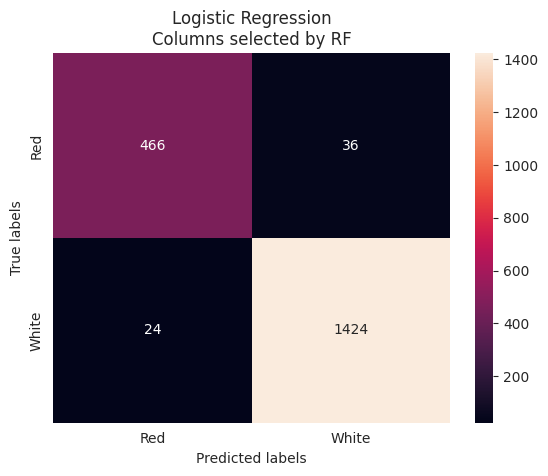

Accuracy
0.9692307692307692


Knn


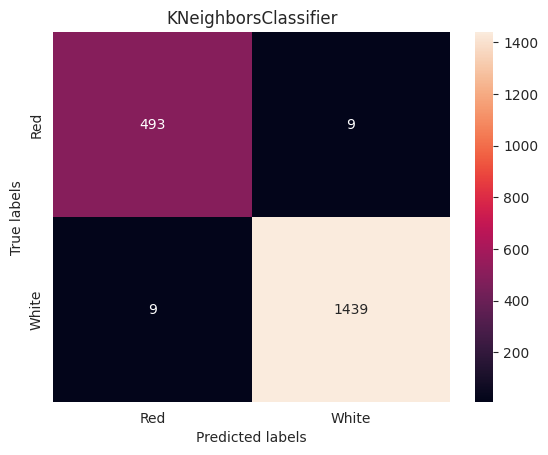

Accuracy
0.9907692307692307


In [6]:
allTesting(RF,outDF, title="Logistic Regression\nColumns selected by RF")
print("\n\nKnn")
knn(RF, outDF, title="KNeighborsClassifier")